WHO \
Diabetes is a chronic, metabolic disease characterized by elevated levels of blood glucose (or blood sugar), which leads over time to serious damage to the heart, blood vessels, eyes, kidneys and nerves. The most common is type 2 diabetes, usually in adults, which occurs when the body becomes resistant to insulin or doesn't make enough insulin. In the past 3 decades the prevalence of type 2 diabetes has risen dramatically in countries of all income levels. Type 1 diabetes, once known as juvenile diabetes or insulin-dependent diabetes, is a chronic condition in which the pancreas produces little or no insulin by itself. For people living with diabetes, access to affordable treatment, including insulin, is critical to their survival. There is a globally agreed target to halt the rise in diabetes and obesity by 2025. 

About 422 million people worldwide have diabetes, the majority living in low-and middle-income countries, and 1.5 million deaths are directly attributed to diabetes each year. Both the number of cases and the prevalence of diabetes have been steadily increasing over the past few decades. 

Symptoms of type 1 diabetes include the need to urinate often, thirst, constant hunger, weight loss, vision changes and fatigue. These symptoms may occur suddenly. Symptoms for type 2 diabetes are generally similar to those of type 1 diabetes but are often less marked. As a result, the disease may be diagnosed several years after onset, after complications have already arisen. For this reason, it is important to be aware of risk factors.

Type 1 diabetes cannot currently be prevented. Effective approaches are available to prevent type 2 diabetes and to prevent the complications and premature death that can result from all types of diabetes. These include policies and practices across whole populations and within specific settings (school, home, workplace) that contribute to good health for everyone, regardless of whether they have diabetes, such as exercising regularly, eating healthily, avoiding smoking, and controlling blood pressure and lipids. 

The starting point for living well with diabetes is an early diagnosis – the longer a person lives with undiagnosed and untreated diabetes, the worse their health outcomes are likely to be. Easy access to basic diagnostics, such as blood glucose testing, should therefore be available in primary health care settings. Patients will need periodic specialist assessment or treatment for complications. 

A series of cost-effective interventions can improve patient outcomes, regardless of what type of diabetes they may have. These interventions include blood glucose control through a combination of diet, physical activity and, if necessary, medication; control of blood pressure and lipids to reduce cardiovascular risk and other complications; and regular screening for damage to the eyes, kidneys and feet to facilitate early treatment.

https://www.kaggle.com/datasets/aravindpcoder/diabetes-dataset/data

In [8]:
"""The data that have been entered initially into the system are: No. of Patient, Sugar Level Blood, Age, Gender, \
Creatinine ratio(Cr), Body Mass Index (BMI), Urea, Cholesterol (Chol), Fasting lipid profile, including total, \
LDL, VLDL, Triglycerides(TG) and HDL Cholesterol , HBA1C, Class (the patient's diabetes disease class may be Diabetic, \
Non-Diabetic, or Predict-Diabetic)."""

"The data that have been entered initially into the system are: No. of Patient, Sugar Level Blood, Age, Gender, Creatinine ratio(Cr), Body Mass Index (BMI), Urea, Cholesterol (Chol), Fasting lipid profile, including total, LDL, VLDL, Triglycerides(TG) and HDL Cholesterol , HBA1C, Class (the patient's diabetes disease class may be Diabetic, Non-Diabetic, or Predict-Diabetic)."

In [264]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import logit
from statsmodels.formula.api import ols
from statsmodels.api import qqplot
from scipy.stats import ttest_ind
import pingouin
import forestplot as fp

from sklearn.model_selection import train_test_split

In [23]:
warnings.filterwarnings('ignore') 

In [49]:
# from csv data to python dataframe
diabete_data = pd.read_csv("Dataset of Diabetes .csv", sep=",")
diabete_data

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [25]:
# missing values ?
diabete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


no missing values \
1000 patients including in this dataset

In [26]:
# duplicates ?
diabete_data.drop_duplicates()
diabete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


no duplicates

In [279]:
print(diabete_data.columns)

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')


In [27]:
# linear correlation between variables ?
diabete_data_correlation = diabete_data.corr()
#diabete_data_correlation

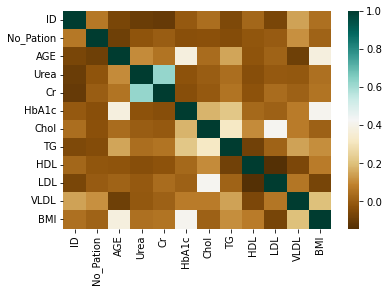

In [277]:
# correlation visualization
sns.heatmap(diabete_data_correlation, cmap="BrBG")
#plt.title("Linear correlation between numerical variables")
plt.savefig("diabete_heatmap.jpg")
plt.show()

linear high correlation find between urea and Creatinine ratio(Cr) \
smaller linear correlation find between AGE and HbA1c \
smaller linear correlation find between AGE and BMI \
smaller linear correlation find between HbA1c and BMI

In [29]:
# statistical description of the data
stats_data = diabete_data[["Urea", 'Cr', "HbA1c", "Chol", "TG", "HDL", "LDL", "VLDL", "BMI"]].describe()
stats_data

,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [50]:
# number of values per ctaegory in the "CLASS" variable
diabete_data_class = diabete_data["CLASS"].value_counts()
diabete_data_class

Y     840
N     102
P      53
Y       4
N       1
Name: CLASS, dtype: int64

In [51]:
# typo issue in the CLASS data
diabete_data["CLASS"] = diabete_data["CLASS"].replace("Y ", "Y")
diabete_data_class = diabete_data["CLASS"].value_counts()
diabete_data_class

Y     844
N     102
P      53
N       1
Name: CLASS, dtype: int64

In [52]:
# typo issue in the CLASS data
diabete_data["CLASS"] = diabete_data["CLASS"].replace("N ", "N")
diabete_data_class = diabete_data["CLASS"].value_counts()
diabete_data_class

Y    844
N    103
P     53
Name: CLASS, dtype: int64

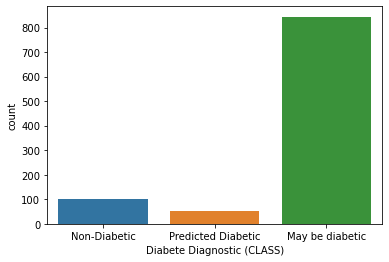

In [133]:
# CLASS data visualization
ax1 = sns.countplot(data=diabete_data, x="CLASS")
ax1.set(xticklabels = (["Non-Diabetic", "Predicted Diabetic", "May be diabetic"]))
plt.xlabel("Diabete Diagnostic (CLASS)")
#plt.title("Distribution of the diabete diagnostic")
plt.savefig("diabete_CLASSdistribution.jpg")
plt.show()

the patient's diabetes disease class may be Diabetic (Y), Non-Diabetic (N), or Predict-Diabetic (P) \
The majority of patients are classified in Y = may be Diabetic

In [54]:
# data distribution per Gender
diabete_data_gender = diabete_data["Gender"].value_counts()
diabete_data_gender

M    565
F    434
f      1
Name: Gender, dtype: int64

In [55]:
# typo issue in Gender
diabete_data["Gender"] = diabete_data["Gender"].replace("f", "F")
diabete_data_gender = diabete_data["Gender"].value_counts()
diabete_data_gender

M    565
F    435
Name: Gender, dtype: int64

In [56]:
# proportion per gender
female = (435 / (565+435)) * 100
male = (565 / (565+435)) * 100
print("female:", round(female, 1), "%")
print("male:", round(male, 1), "%")

female: 43.5 %
male: 56.5 %


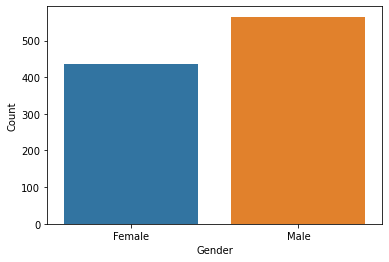

In [136]:
# Gender data visualization
ax2 = sns.countplot(data=diabete_data, x="Gender")
ax2.set(xticklabels = (["Female", "Male"]))
plt.xlabel("Gender")
plt.ylabel("Count")
#plt.title("Distribution of the Gender data")
plt.savefig("diabete_GENDERdistribution.jpg")
plt.show()

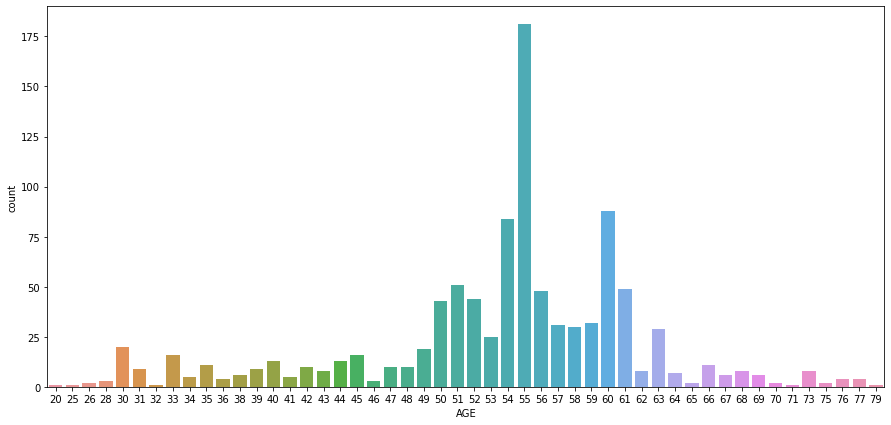

In [139]:
# data distribution of the AGE variable
plt.figure(figsize=(15, 7))
sns.countplot(data=diabete_data, x="AGE")
#plt.title("Distribition of the AGE")
plt.savefig("diabete_AGEdistribution.jpg")
plt.show()

Majority of patients are between 50 and 63 years old.

In [140]:
old_data = diabete_data[(diabete_data["AGE"] >= 50) & (diabete_data["AGE"] <= 63)]
print(min(old_data["AGE"]))
print(max(old_data["AGE"]))

50
63


In [141]:
count_old = old_data["ID"].count()
proportion_old = (count_old/1000) * 100
print(count_old)
print(proportion_old)

743
74.3


74% of the data come from people between 50 and 63 years old --> biais in the analysis ???

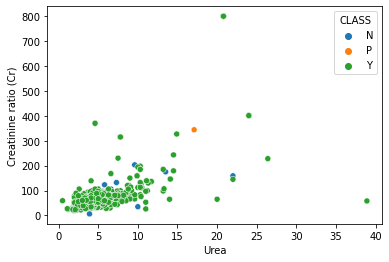

In [145]:
# scatter visualisation between Urea and Creatinine ratio per CLASS
g1 = sns.scatterplot(data=diabete_data, x="Urea", y="Cr", hue="CLASS")
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.title("Correlation between Urea and Creatinine ratio per CLASS")
plt.ylabel("Creatinine ratio (Cr)")
plt.savefig("diabete_ureaVScreatinine.jpg")
plt.show()

Urea and Creatinine ratio variables seem to be linked for the smaller values but are not linked to the CLASS

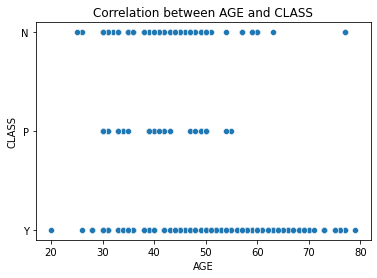

In [112]:
# scatter visualisation between AGE and CLASS data
sns.scatterplot(data=diabete_data, x="AGE", y="CLASS")
plt.title("Correlation between AGE and CLASS")
plt.show()

specific CLASS is not linked to a specific AGE

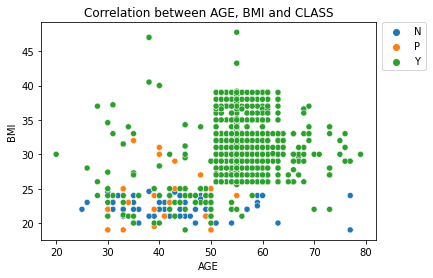

In [113]:
# scatter visualisation between AGE and BMI data par CLASS
sns.scatterplot(data=diabete_data, x="AGE", y="BMI", hue="CLASS")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Correlation between AGE, BMI and CLASS")
plt.show()

After 50 years old and high BMI (higher than 25), patients may be Diabetic \
Are the analysis biaised by the fact that 74% of the data are coming from these ages ???

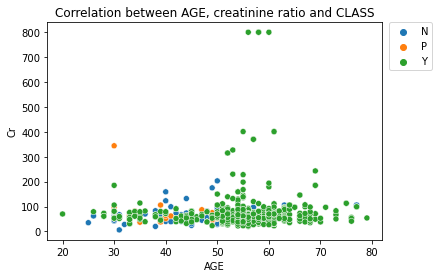

In [281]:
sns.scatterplot(data=diabete_data, x="AGE", y="Cr", hue="CLASS")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Correlation between AGE, creatinine ratio and CLASS")
plt.show()

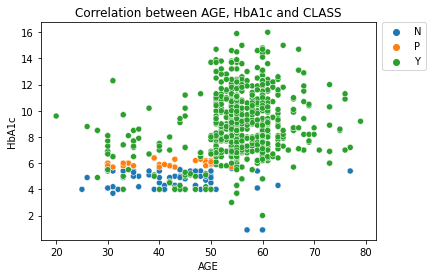

In [114]:
# scatter visualisation between AGE and HbA1c data par CLASS
sns.scatterplot(data=diabete_data, x="AGE", y="HbA1c", hue="CLASS")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Correlation between AGE, HbA1c and CLASS")
plt.show()

A number of studies have shown that glycated hemoglobin (HbA1c) concentration provides a better estimate of average hyperglycemia than routine determinations of blood glucose concentration. HbA1c measurement in diagnosis of type 2 diabetes has been recommended by American Diabetes Association, World Health Organization and International Diabetes Federation 

With a HbA1c higher than 6, majority of patients may be Diabetic

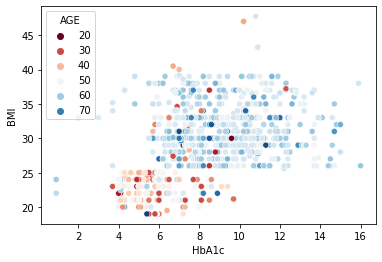

In [147]:
# scatter visualisation between HbA1c marker, BLI and AGE variables
sns.scatterplot(data=diabete_data, x="HbA1c", y="BMI", hue="AGE", palette="RdBu")
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.title("Correlation between HbA1c, BMI and AGE")
plt.savefig("diabete_bmiVShbA1c.jpg")
plt.show()

After 60 years old, majority of patients have high BMI and high HbA1c marker

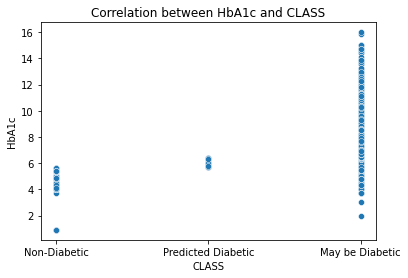

In [116]:
# scatter visualisation between HbA1c and CLASS data
g2 = sns.scatterplot(data=diabete_data, x="CLASS", y="HbA1c")
plt.title("Correlation between HbA1c and CLASS")
g2.set_xticklabels(["Non-Diabetic", "Predicted Diabetic", "May be Diabetic"])
plt.show()

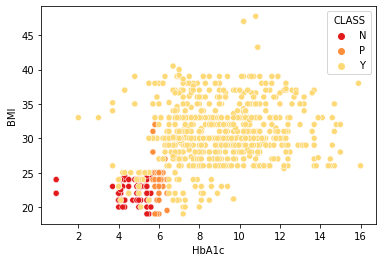

In [149]:
# scatter visualisation between HbA1c marker, BLI and AGE variables
sns.scatterplot(data=diabete_data, x="HbA1c", y="BMI", hue="CLASS", palette="YlOrRd_r")
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.title("Corraletion between HbA1c, BMI and CLASS")
plt.savefig("diabete_bmiVShbA1c.jpg")
plt.show()

BMI>25 and HbA1c>6 seem to lead to the "may be Diabetic" diagnostic

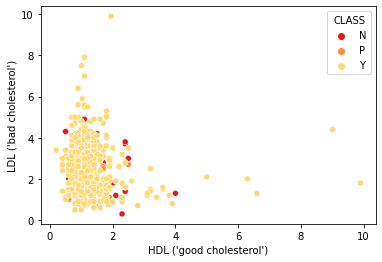

In [175]:
# scatter visualisation between HDL, LDL and CLASS variables
sns.scatterplot(data=diabete_data, x="HDL", y="LDL", hue="CLASS", palette="YlOrRd_r")
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.title("HDL versus LDL per CLASS")
plt.xlabel("HDL ('good cholesterol')")
plt.ylabel("LDL ('bad cholesterol')")
plt.savefig("diabete_hdlVSldl.jpg")
plt.show()

HDL is the "good cholesterol" \
LDL is the "bad cholesterol" 

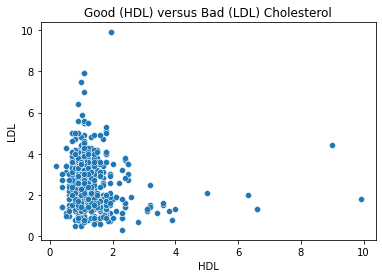

In [120]:
# scatter visualisation between HDL and LDL variables
sns.scatterplot(data=diabete_data, x="HDL", y="LDL")
plt.title("Good (HDL) versus Bad (LDL) Cholesterol")
plt.show()

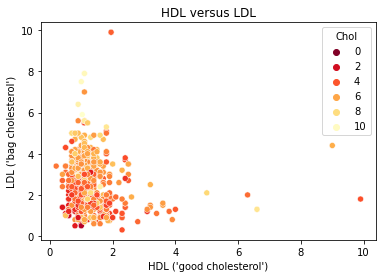

In [154]:
# scatter visualisation between LDL, Cholesterol and HDL variables
sns.scatterplot(data=diabete_data, x="HDL", y="LDL", hue="Chol", palette="YlOrRd_r")
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("HDL versus LDL")
plt.xlabel("HDL ('good cholesterol')")
plt.ylabel("LDL ('bag cholesterol')")
#plt.savefig("diabete_hdlVSldl_2.jpg")
plt.show()

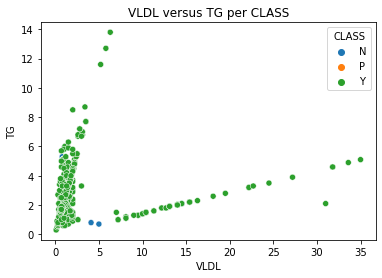

In [155]:
# scatter visualisation between VLDL, TG and CLASS variables
sns.scatterplot(data=diabete_data, x="VLDL", y="TG", hue="CLASS")
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("VLDL versus TG per CLASS")
plt.show()

VLDL are assembled by the liver from triglycerides, either newly synthesized or absorbed by the liver (from adipose tissue). They are part of the endogenous lipoprotein cycle. These VLDL transport triglycerides mainly to the muscles, triglycerides being an important energy source for the muscles.

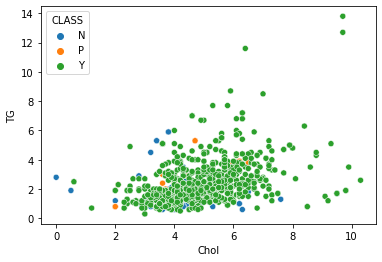

In [240]:
sns.scatterplot(x=diabete_data['Chol'], y=diabete_data['TG'], hue=diabete_data["CLASS"])
plt.show()

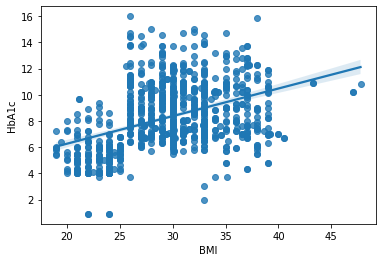

In [164]:
# regression visualisation between BMI versus HbA1c
sns.regplot(data=diabete_data, x="BMI", y="HbA1c")
plt.show()

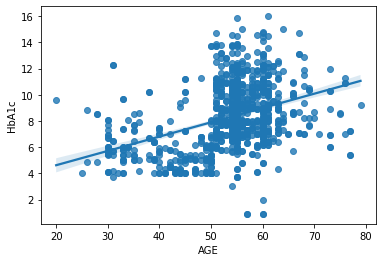

In [167]:
#  regression visualisation between AGE versus HbA1c
sns.regplot(data=diabete_data, x="AGE", y="HbA1c")
plt.show()

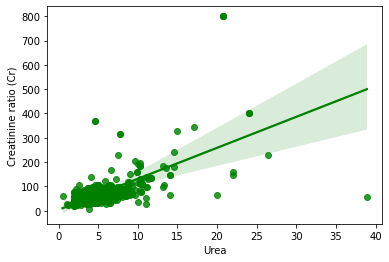

In [171]:
# regression visualization of Urea versus Creatinine (Cr)
sns.regplot(data=diabete_data, x="Urea", y="Cr", color="green")
plt.ylabel("Creatinine ratio (Cr)")
plt.show()

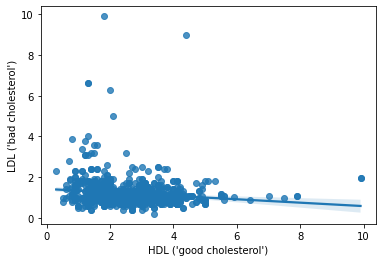

In [174]:
# regression visualization of LDL versus HDL
sns.regplot(data=diabete_data, x="LDL", y="HDL")
plt.xlabel("HDL ('good cholesterol')")
plt.ylabel("LDL ('bad cholesterol')")
plt.show()

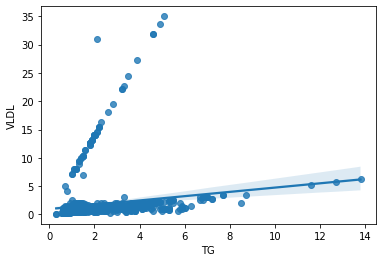

In [177]:
# regression visualization of TG versus VLDL
sns.regplot(data=diabete_data, x="TG", y="VLDL")
plt.show()

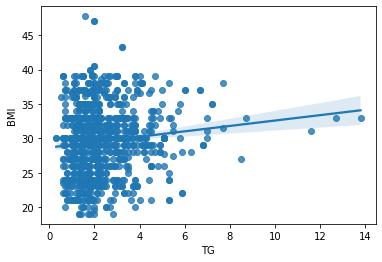

In [250]:
# regression visualization of TG versus BMI
sns.regplot(data=diabete_data, x="TG", y="BMI")
plt.show()

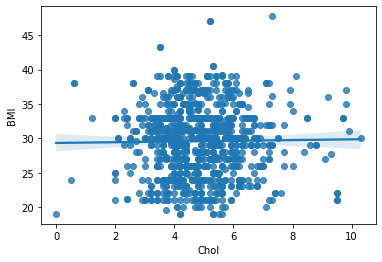

In [249]:
# regression visualization of Chol versus BMI
sns.regplot(data=diabete_data, x="Chol", y="BMI")
plt.show()

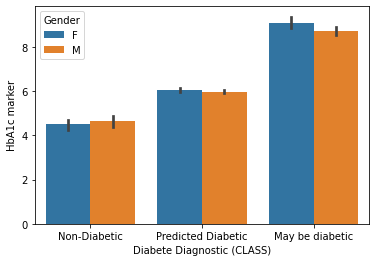

In [256]:
# barplot visualization of CLASS, HbAIc and Gender
ax5 = sns.barplot(x=diabete_data['CLASS'], y=diabete_data['HbA1c'], hue=diabete_data["Gender"])
ax5.set(xticklabels = (["Non-Diabetic", "Predicted Diabetic", "May be diabetic"]))
plt.xlabel("Diabete Diagnostic (CLASS)")
plt.ylabel("HbA1c marker")
plt.savefig("diabete_HbA1cVSclass.jpg")
plt.show()

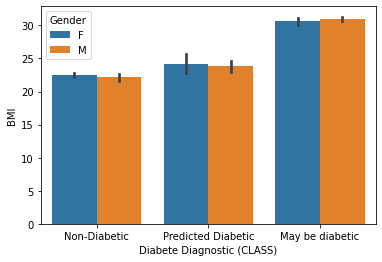

In [226]:
# barplot visualization of CLASS, BMI and Gender
ax6 = sns.barplot(x=diabete_data['CLASS'], y=diabete_data['BMI'], hue=diabete_data["Gender"])
ax6.set(xticklabels = (["Non-Diabetic", "Predicted Diabetic", "May be diabetic"]))
plt.xlabel("Diabete Diagnostic (CLASS)")
plt.show()

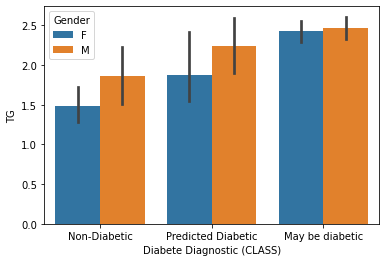

In [228]:
# barplot visualization of CLASS, TG and Gender
ax7 = sns.barplot(x=diabete_data['CLASS'], y=diabete_data['TG'], hue=diabete_data["Gender"])
ax7.set(xticklabels = (["Non-Diabetic", "Predicted Diabetic", "May be diabetic"]))
plt.xlabel("Diabete Diagnostic (CLASS)")
plt.show()

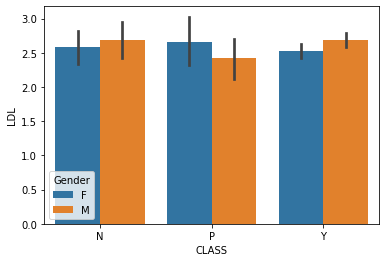

In [257]:
# barplot visualization of CLASS, LDL and Gender
sns.barplot(x=diabete_data['CLASS'], y=diabete_data['LDL'], hue=diabete_data["Gender"])
plt.show()

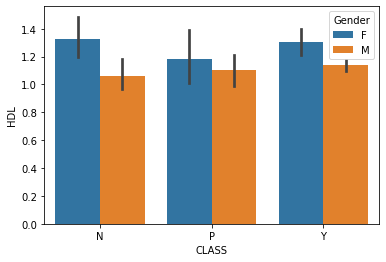

In [258]:
# barplot visualization of CLASS, HDL and Gender
sns.barplot(x=diabete_data['CLASS'], y=diabete_data['HDL'], hue=diabete_data["Gender"])
plt.show()

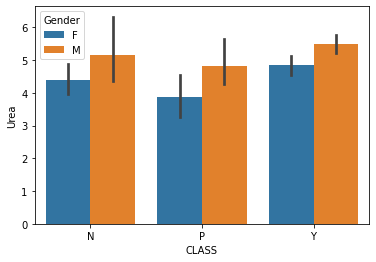

In [259]:
# barplot visualization of CLASS, Urea and Gender
sns.barplot(x=diabete_data['CLASS'], y=diabete_data['Urea'], hue=diabete_data["Gender"])
plt.show()

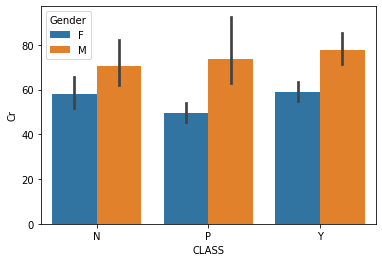

In [260]:
# barplot visualization of CLASS, Creatinine and Gender
sns.barplot(x=diabete_data['CLASS'], y=diabete_data['Cr'], hue=diabete_data["Gender"])
plt.show()

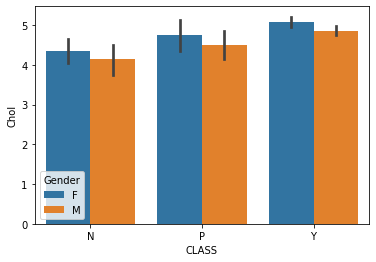

In [261]:
# barplot visualization of CLASS, Cholesterol and Gender
sns.barplot(x=diabete_data['CLASS'], y=diabete_data['Chol'], hue=diabete_data["Gender"])
plt.show()

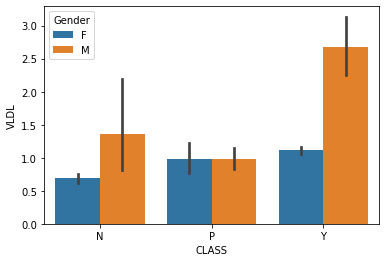

In [262]:
# barplot visualization of CLASS, VLDL and Gender
sns.barplot(x=diabete_data['CLASS'], y=diabete_data['VLDL'], hue=diabete_data["Gender"])
plt.show()

In [269]:
# regression linear test (Ordinary Least Squares)
stat1 = ols("HbA1c ~ BMI + AGE + Chol + TG + VLDL + Cr + Urea + LDL + HDL", data = diabete_data).fit()
print(stat1.summary())
#print(stat1.params)

                            OLS Regression Results                            
Dep. Variable:                  HbA1c   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     41.31
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           7.39e-63
Time:                        15:20:35   Log-Likelihood:                -2188.8
No. Observations:                1000   AIC:                             4398.
Df Residuals:                     990   BIC:                             4447.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5133      0.580     -2.610      0.0

The intercept tells the average value of these omitted variables and noise present in model. \
Standard error shows the sampling variability of these parameters. \
p-value is the probability of obtaining the t statistics at least as contradictory to H0  as calculated from assuming that the null hypothesis is true. \

R2 is the coefficient of determination that tells us that how much percentage variation independent variable can be explained by independent variable.\
F test tells the goodness of fit of a regression.

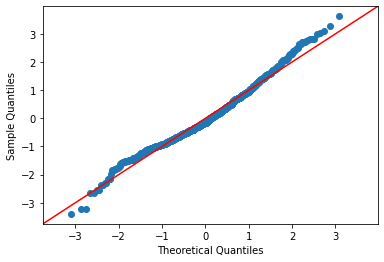

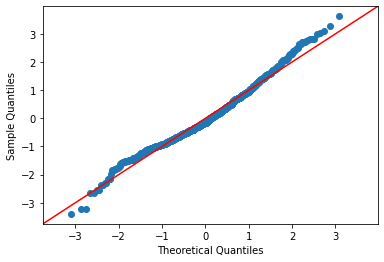

In [270]:
# Q-Q plot pour visualiser les résidus
sm.qqplot(stat1.resid, fit=True, line="45")

In [271]:
# données de odds-ratios, p-values et interval dans une dataframe
odds = pd.DataFrame(np.exp(stat1.params), columns = ['OR'])
odds['p-value']= stat1.pvalues
odds[['2.5%', '97.5%']] = np.exp(stat1.conf_int())
odds

,OR,p-value,2.5%,97.5%
Intercept,0.220179,9.180566e-03,0.070584,0.686823
BMI,1.168604,1.784562e-22,1.133397,1.204905
AGE,1.075240,2.711314e-16,1.057016,1.093777
Chol,1.321483,1.301824e-05,1.166397,1.497189
TG,1.207904,5.052178e-04,1.086177,1.343273
VLDL,1.007747,6.964200e-01,0.969393,1.047618
Cr,0.998009,1.762699e-01,0.995128,1.000898
Urea,0.966690,2.612915e-01,0.911173,1.025591
LDL,0.927788,2.894250e-01,0.807577,1.065892
HDL,0.996517,9.744259e-01,0.804920,1.233721


les valeurs de odds-ratios sont élevées et les p-values faibles

In [272]:
# add 'label' column for the forestplot
odds["label"] = ["HbA1c", "BMI", "AGE", "Chol", "TG", "VLDL", "Cr", "Urea", "LDL", "HDL"]
odds

,OR,p-value,2.5%,97.5%,label
Intercept,0.220179,9.180566e-03,0.070584,0.686823,HbA1c
BMI,1.168604,1.784562e-22,1.133397,1.204905,BMI
AGE,1.075240,2.711314e-16,1.057016,1.093777,AGE
Chol,1.321483,1.301824e-05,1.166397,1.497189,Chol
TG,1.207904,5.052178e-04,1.086177,1.343273,TG
VLDL,1.007747,6.964200e-01,0.969393,1.047618,VLDL
Cr,0.998009,1.762699e-01,0.995128,1.000898,Cr
Urea,0.966690,2.612915e-01,0.911173,1.025591,Urea
LDL,0.927788,2.894250e-01,0.807577,1.065892,LDL
HDL,0.996517,9.744259e-01,0.804920,1.233721,HDL


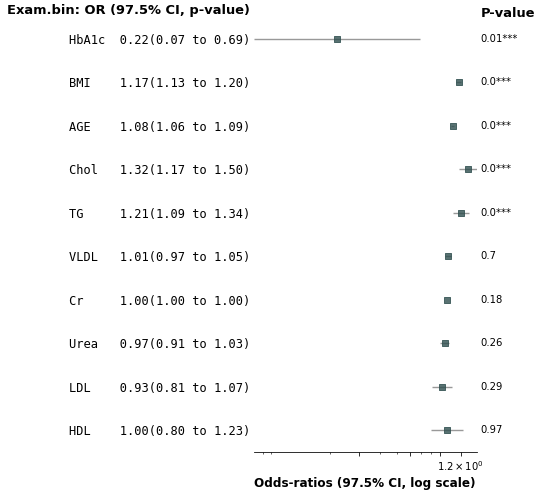

In [274]:
# forestplot visualization
fp.forestplot(odds, estimate="OR", ll="2.5%", hl="97.5%", pval="p-value", varlabel="label", logscale = True, \
              ylabel="Exam.bin: OR (97.5% CI, p-value)", xlabel="Odds-ratios (97.5% CI, log scale)")
plt.savefig("diabete_forestplot.jpg")
plt.show()

Variables BMI, AGE, Chol and TG are positively and significantly link to the variable HbA1. \
Variables VLDL, Cr, Urea, LDL and HDL are positively link to the variable HbA1 but it's not stastically significant.

In [203]:
# Test about one categorical and one numeric variable --> students T-Test
# Ho: There is no difference
# H1: There is a difference

t_stat1, p1 = ttest_ind(diabete_data.query('Gender=="F"')['HbA1c'], diabete_data.query('Gender=="M"')['HbA1c'])
 print("p_value: ",round(p1,2))
#print("t vlaue:", round(t_stat1, 2))

p_value:  0.77


If a p-value reported from a t test is less than 0.05, then that result is said to be statistically significant. \
If a p-value is greater than 0.05, then the result is insignificant.

The p-value is more than 0.05 hence, we accept the null hypothesis at a 95% level of confidence. \
That means that there is statistically no difference in HbA1c between men and women.

In [205]:
# students T-Test
t_stat2, p2 = ttest_ind(diabete_data.query('Gender=="F"')['BMI'], diabete_data.query('Gender=="M"')['BMI'])
print("p_value: ",round(p2,2))

p_value:  0.02


The p-value is less than 0.05 hence, we reject the null hypothesis at a 95% level of confidence. \
That means that there is statistically a difference in BMI between men and women.

In [207]:
# students T-Test
t_stat3, p3 = ttest_ind(diabete_data.query('CLASS=="Y"')['HbA1c'], diabete_data.query('CLASS=="N"')['HbA1c'])
print("p_value: ",round(p3,2))

p_value:  0.0


The p-value is less than 0.05 hence, we reject the null hypothesis at a 95% level of confidence. \
That means that there is a difference in HbA1c between 'may be diabetic' and 'non-diabetic'.

In [208]:
# students T-Test
t_stat4, p4 = ttest_ind(diabete_data.query('CLASS=="Y"')['HbA1c'], diabete_data.query('CLASS=="P"')['HbA1c'])
print("p_value: ",round(p4,2))

p_value:  0.0


The p-value is less than 0.05 hence, we reject the null hypothesis at a 95% level of confidence. \
That means that there is a difference in HbA1c between 'may be diabetic' and 'predicted diabetic'.

In [209]:
# students T-Test
t_stat5, p5 = ttest_ind(diabete_data.query('CLASS=="Y"')['Chol'], diabete_data.query('CLASS=="N"')['Chol'])
print("p_value: ",round(p5,2))

p_value:  0.0


The p-value is less than 0.05 hence, we reject the null hypothesis at a 95% level of confidence. \
That means that there is a difference in Cholesterol between 'may be diabetic' and 'non-diabetic'.

In [210]:
# students T-Test
t_stat6, p6 = ttest_ind(diabete_data.query('CLASS=="Y"')['TG'], diabete_data.query('CLASS=="N"')['TG'])
print("p_value: ",round(p6,2))

p_value:  0.0


The p-value is less than 0.05 hence, we reject the null hypothesis at a 95% level of confidence. \
That means that there is a difference in triglycerides (TG)  between 'may be diabetic' and 'non-diabetic'.

In [206]:
# Test about numerical variables --> Chi2 test
# H0 : les variables sont dépendantes
expected1, observed1, stats1 = pingouin.chi2_independence(data=diabete_data, x="Urea", y="Cr")
print(stats1.round(2))

                 test  lambda      chi2      dof  pval  cramer  power
0             pearson    1.00  33906.46  12208.0   0.0    0.56   0.63
1        cressie-read    0.67  11662.55  12208.0   1.0    0.33   0.17
2      log-likelihood    0.00   4379.54  12208.0   1.0    0.20   0.08
3       freeman-tukey   -0.50       NaN  12208.0   NaN     NaN    NaN
4  mod-log-likelihood   -1.00       inf  12208.0   0.0     inf    NaN
5              neyman   -2.00       NaN  12208.0   NaN     NaN    NaN


For a Chi-square test, a p-value that is less than or equal to your significance level indicates there is sufficient \
evidence to conclude that the observed distribution is not the same as the expected distribution. \
You can conclude that a relationship exists between the categorical variables.

chi2(12208) = 33906 and p-value < 0.01 donc H0 est acceptée, la variable Urea dépend de la variable Cr.

In [201]:
# Chi2 test
expected2, observed2, stats2 = pingouin.chi2_independence(data=diabete_data, x="HbA1c", y="BMI")
print(stats2.round(2))

                 test  lambda     chi2     dof  pval  cramer  power
0             pearson    1.00  8014.39  6930.0   0.0    0.36   0.29
1        cressie-read    0.67  4547.07  6930.0   1.0    0.27   0.15
2      log-likelihood    0.00  2842.06  6930.0   1.0    0.21   0.10
3       freeman-tukey   -0.50      NaN  6930.0   NaN     NaN    NaN
4  mod-log-likelihood   -1.00      inf  6930.0   0.0     inf    NaN
5              neyman   -2.00      NaN  6930.0   NaN     NaN    NaN


chi2(6930) = 8014 and p-value < 0.01 donc H0 est acceptée, la variable HbA1c dépend de la variable BMI.

In [211]:
# Chi2 test
expected3, observed3, stats3 = pingouin.chi2_independence(data=diabete_data, x="LDL", y="HDL")
print(stats3.round(2))

                 test  lambda     chi2     dof  pval  cramer  power
0             pearson    1.00  9630.95  3008.0   0.0    0.45   0.82
1        cressie-read    0.67  3466.92  3008.0   0.0    0.27   0.24
2      log-likelihood    0.00  1661.45  3008.0   1.0    0.19   0.12
3       freeman-tukey   -0.50      NaN  3008.0   NaN     NaN    NaN
4  mod-log-likelihood   -1.00      inf  3008.0   0.0     inf    NaN
5              neyman   -2.00      NaN  3008.0   NaN     NaN    NaN


chi2(3008) = 9630 and p-value < 0.01 donc H0 est acceptée, la variable LDL dépend de la variable HDL.

In [212]:
# Chi2 test
expected4, observed4, stats4 = pingouin.chi2_independence(data=diabete_data, x="Gender", y="CLASS")
print(stats4.round(2))

                 test  lambda   chi2  dof  pval  cramer  power
0             pearson    1.00  18.20  2.0   0.0    0.13   0.98
1        cressie-read    0.67  18.15  2.0   0.0    0.13   0.98
2      log-likelihood    0.00  18.16  2.0   0.0    0.13   0.98
3       freeman-tukey   -0.50  18.27  2.0   0.0    0.14   0.98
4  mod-log-likelihood   -1.00  18.49  2.0   0.0    0.14   0.98
5              neyman   -2.00  19.22  2.0   0.0    0.14   0.98


chi2(2) = 18 and p-value < 0.01 donc H0 est acceptée, la variable Gender dépend de la variable CLASS.

In [278]:
# Chi2 test
expected5, observed5, stats5 = pingouin.chi2_independence(data=diabete_data, x="CLASS", y="HbA1c")
print(stats5.round(2))

                 test  lambda     chi2    dof  pval  cramer  power
0             pearson    1.00  1360.27  220.0   0.0    0.82    1.0
1        cressie-read    0.67  1039.74  220.0   0.0    0.72    1.0
2      log-likelihood    0.00   819.14  220.0   0.0    0.64    1.0
3       freeman-tukey   -0.50      NaN  220.0   NaN     NaN    NaN
4  mod-log-likelihood   -1.00      inf  220.0   0.0     inf    NaN
5              neyman   -2.00      NaN  220.0   NaN     NaN    NaN


chi2(220) = 1360 and p-value < 0.01 donc H0 est acceptée, la variable CLASS dépend de la variable HbA1c.

In [280]:
# Chi2 test
expected6, observed6, stats6 = pingouin.chi2_independence(data=diabete_data, x="CLASS", y="BMI")
print(stats6.round(2))

                 test  lambda    chi2    dof  pval  cramer  power
0             pearson    1.00  819.06  126.0   0.0    0.64    1.0
1        cressie-read    0.67  692.21  126.0   0.0    0.59    1.0
2      log-likelihood    0.00  622.82  126.0   0.0    0.56    1.0
3       freeman-tukey   -0.50     NaN  126.0   NaN     NaN    NaN
4  mod-log-likelihood   -1.00     inf  126.0   0.0     inf    NaN
5              neyman   -2.00     NaN  126.0   NaN     NaN    NaN


In [ ]:
chi2(126) = 819 and p-value < 0.01 donc H0 est acceptée, la variable CLASS dépend de la variable BMI.

In [247]:
# split data for train and test subgroups
train, test = train_test_split(diabete_data, test_size=0.2, random_state=42)
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)
print(round(train.describe(), 1))
print(round(test.describe(), 1))

          ID   No_Pation    AGE   Urea     Cr  HbA1c   Chol     TG    HDL  \
count  800.0       800.0  800.0  800.0  800.0  800.0  800.0  800.0  800.0   
mean   342.1    229535.1   53.4    5.1   68.9    8.3    4.8    2.3    1.2   
std    242.1   2953331.8    8.7    2.6   62.5    2.5    1.3    1.4    0.6   
min      1.0       123.0   20.0    0.5    6.0    0.9    0.0    0.3    0.2   
25%    126.0     24069.2   51.0    3.7   48.0    6.5    4.0    1.5    0.9   
50%    302.5     34395.5   55.0    4.6   60.0    8.0    4.7    2.0    1.1   
75%    551.0     45387.2   59.0    5.7   73.0   10.0    5.5    2.9    1.3   
max    799.0  75435657.0   77.0   24.0  800.0   16.0    9.9   13.8    9.9   

         LDL   VLDL    BMI  
count  800.0  800.0  800.0  
mean     2.6    1.8   29.5  
std      1.1    3.5    5.0  
min      0.5    0.1   19.0  
25%      1.8    0.7   26.0  
50%      2.5    0.9   30.0  
75%      3.3    1.5   33.0  
max      9.9   33.6   47.8  
          ID   No_Pation    AGE   Urea     Cr